# Mini Hackathon

## Import

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('data/fashion-mnist_train.csv')

## Exploratoy Data Analysis

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The dataset is composed of `784` pixels values and the `label` column. 

In [4]:
df['label'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: label, dtype: int64

Classes are perfectly balanced.

Below we collect in a list the labels for each class.

In [5]:
label_names =['T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankleboot']

To visualize the images we use the `imshow` function in matplotlib.

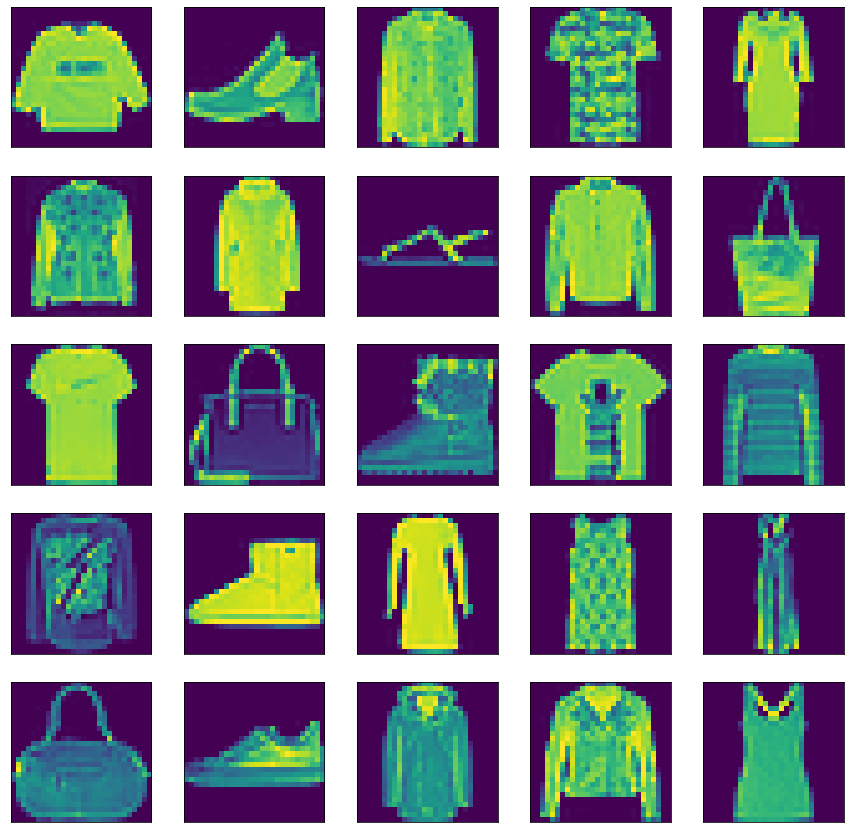

In [6]:
axes_x = df.iloc[:,1:]
axes_y = df.iloc[:,0] 
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([]) # this not to show pixels on axes
    plt.yticks([]) # this not to show pixels on axes
    plt.imshow(axes_x.loc[i].values.reshape((28,28)))
plt.show();

We can see how the fisrt 25 images are representing different garments.

## Preprocessing

In [7]:
X = df.drop(columns=['label'])
y = df['label']

Being our problem a Multicategory, we need to encode y, we do so using `LabelEncoder` and storying the result in the variable `dummy_y`.
We will need `y` for interpeting results later on.

In [8]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.to_categorical(encoded_y)

We train test split our variables using `dummy_y`

In [9]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.15, random_state = 42)
#check dimension
X_test.shape, y_test.shape

((9000, 784), (9000, 10))

Then using the same settings and random state we create `z_train` and `z_test` that we will need later for intepreting results in confusion matrix.

In [10]:
Z_train, Z_test, z_train, z_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [11]:
X_train.shape, y_train.shape

((51000, 784), (51000, 10))

## NN

In [12]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=256,  # 60000/256 = 235 weight updates per epoch
                    epochs=10,
                    verbose=1)

Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 16.7363 - accuracy: 0.5055 - val_loss: 1.1558 - val_accuracy: 0.6833
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 1.0879 - accuracy: 0.7060 - val_loss: 0.8961 - val_accuracy: 0.7032
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.8095 - accuracy: 0.7160 - val_loss: 0.7275 - val_accuracy: 0.7183
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.7317 - val_loss: 0.7018 - val_accuracy: 0.7370
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.6266 - accuracy: 0.7602 - val_loss: 0.6291 - val_accuracy: 0.7627
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5706 - accuracy: 0.7852 - val_loss: 0.5909 - val_accuracy: 0.7846
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7961 - val_loss: 0.5862 - val_accuracy: 0.7788
Epoch

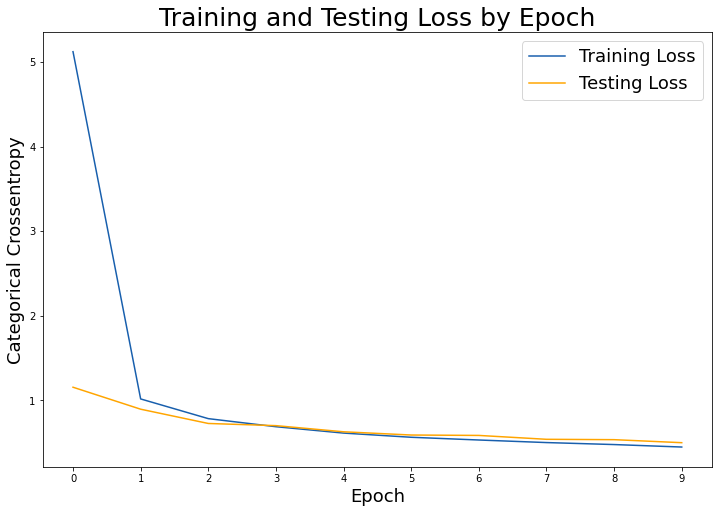

In [14]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')
# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(10), np.arange(10))
plt.legend(fontsize = 18);

# Mitchel

In [15]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28, 1)))
model.add(Dense(128, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2)) # refers to nodes in the first hidden layer
model.add(Dense(32, activation = 'relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax', kernel_regularizer=l2(0.001)))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    batch_size=256,  # 60000/256 = 235 weight updates per epoch
                    epochs=60,
                    verbose=1, 
                    callbacks=[early_stop])

Epoch 1/60
200/200 [==============================] - 1s 4ms/step - loss: 26.1662 - accuracy: 0.1633 - val_loss: 2.2498 - val_accuracy: 0.2492
Epoch 2/60
200/200 [==============================] - 1s 3ms/step - loss: 2.4056 - accuracy: 0.2214 - val_loss: 2.1252 - val_accuracy: 0.2822
Epoch 3/60
200/200 [==============================] - 1s 3ms/step - loss: 2.2180 - accuracy: 0.2557 - val_loss: 1.9254 - val_accuracy: 0.3378
Epoch 4/60
200/200 [==============================] - 1s 3ms/step - loss: 2.0430 - accuracy: 0.2879 - val_loss: 1.7897 - val_accuracy: 0.3750
Epoch 5/60
200/200 [==============================] - 1s 3ms/step - loss: 1.9068 - accuracy: 0.3491 - val_loss: 1.6756 - val_accuracy: 0.4539
Epoch 6/60
200/200 [==============================] - 1s 3ms/step - loss: 1.7780 - accuracy: 0.4131 - val_loss: 1.5361 - val_accuracy: 0.5193
Epoch 7/60
200/200 [==============================] - 1s 3ms/step - loss: 1.6919 - accuracy: 0.4549 - val_loss: 1.4365 - val_accuracy: 0.5680
Epoch

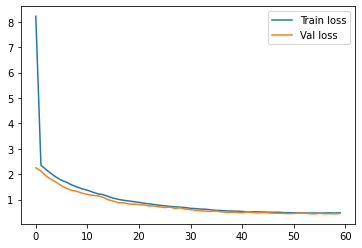

In [26]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend();

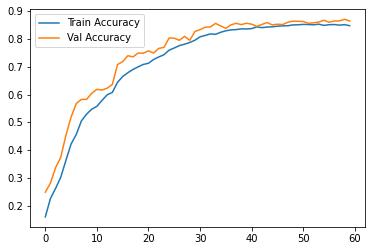

In [27]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend();

In [19]:
predictions = np.argmax(model.predict(X_test), axis=-1)
prediction = np.argmax(to_categorical(predictions), axis = 1)
prediction = encoder.inverse_transform(prediction)
correct = len([i for i, j in zip(prediction, z_test) if i == j])
perc_correct = round(len([i for i, j in zip(prediction, z_test) if i == j])*100/len(z_test), 2)
perc_correct

86.46

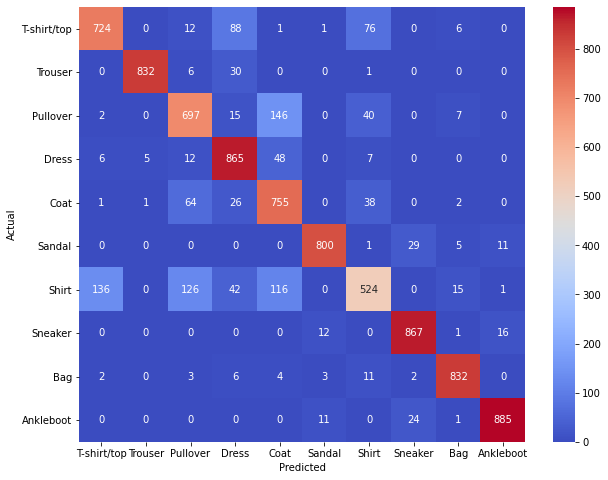

In [20]:
conf_mat = confusion_matrix(z_test, prediction)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap= 'coolwarm',
            xticklabels= label_names, yticklabels=label_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

We notice that `Shirt` is the lowest performance of all, and it gets confused with `Pullover`, `Coat`, `T-shirt/top`.

Also `Dress` seems to have the same confusion.

This is reasonable for our model.

## Gridsearch

In [21]:
def model_func(layer_one_neurons=128, layer_two_neurons=32, layer_three_neurons=32):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(layer_one_neurons, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(layer_two_neurons, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(layer_three_neurons, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax', kernel_regularizer=l2(0.001)))
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')
    return model

In [22]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
nn = KerasClassifier(build_fn=model_func, batch_size=512, epochs=10, verbose=0)
params = {'layer_one_neurons': [8, 32, 64, 128],
          'layer_two_neurons': [16, 32, 64],
          'layer_three_neurons': [16, 32, 64],
          'batch_size': [128, 256, 512, 1024],
          'epochs': [30, 100]}
gs = GridSearchCV(nn, params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

The gridsearch is still running ....